Total frames in file: 109075


Processing groups:   0%|          | 0/5 [00:00<?, ?it/s]

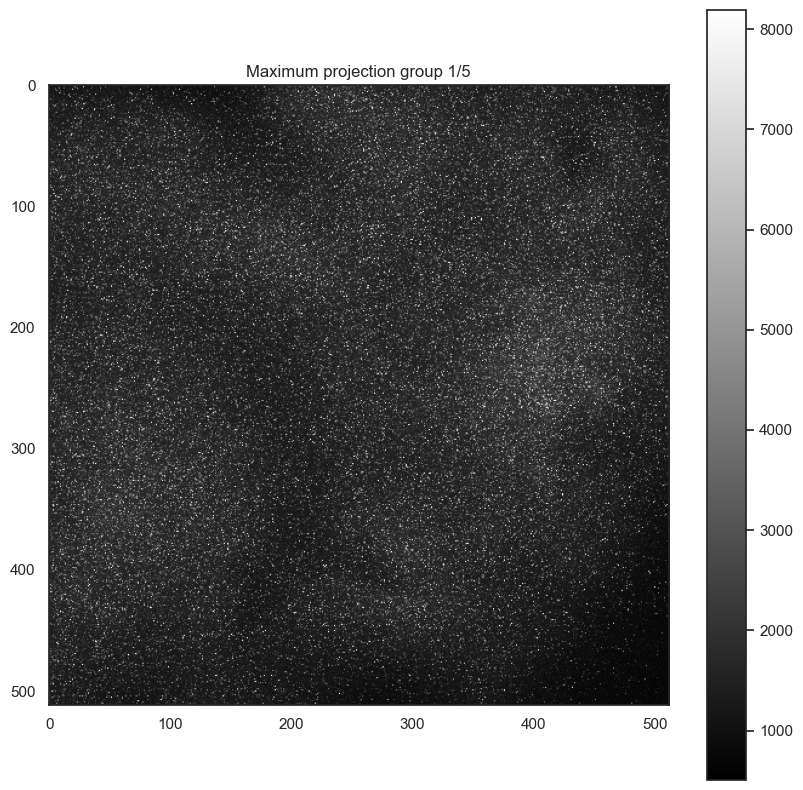

Processing groups:  20%|██        | 1/5 [04:22<17:28, 262.11s/it]

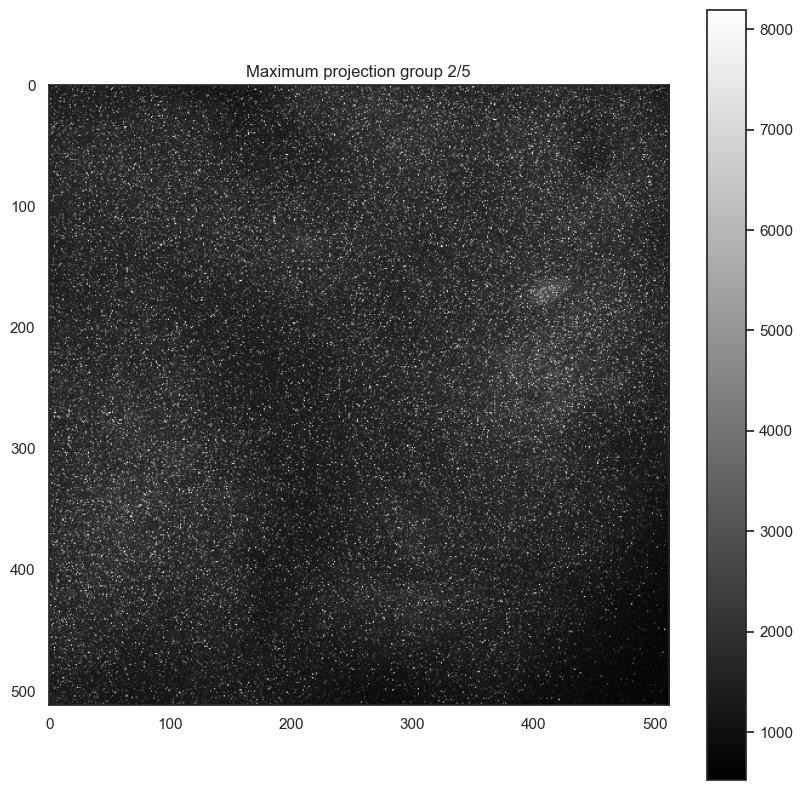

Processing groups:  40%|████      | 2/5 [09:14<13:59, 279.69s/it]

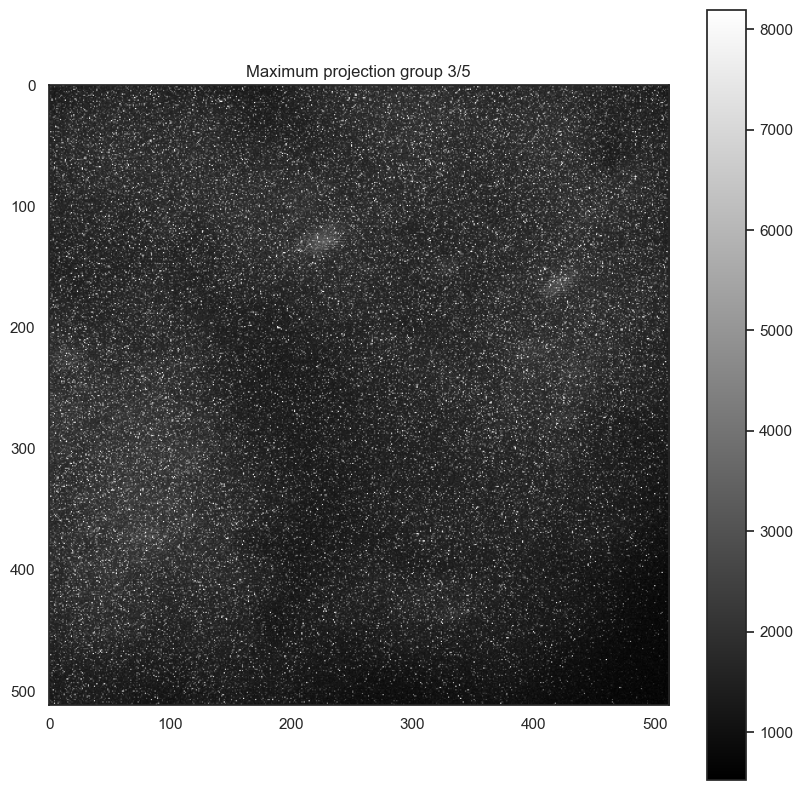

Processing groups:  60%|██████    | 3/5 [14:00<09:25, 282.75s/it]

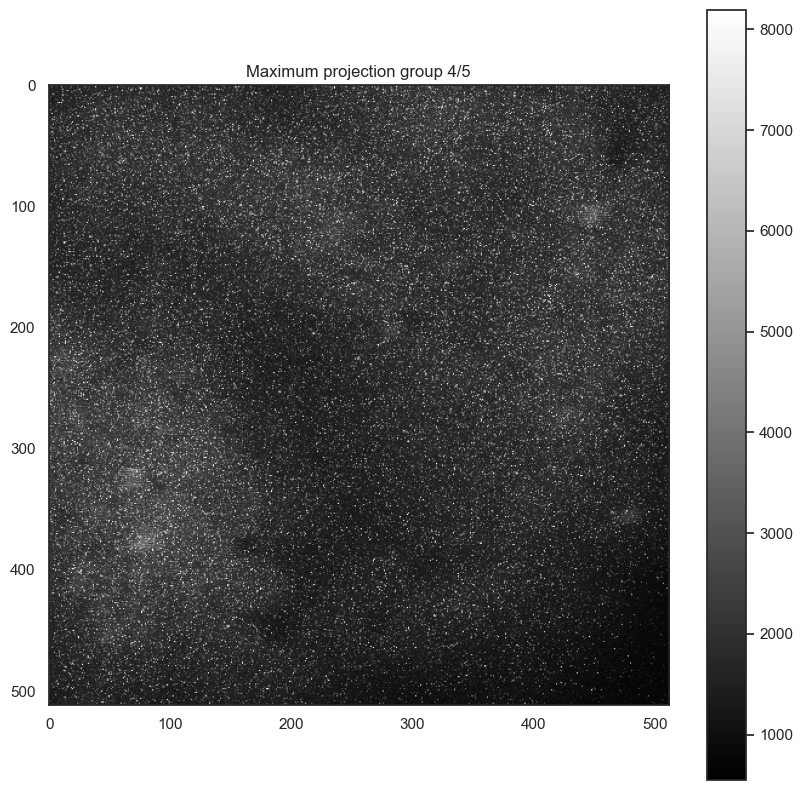

Processing groups:  80%|████████  | 4/5 [18:53<04:46, 286.64s/it]

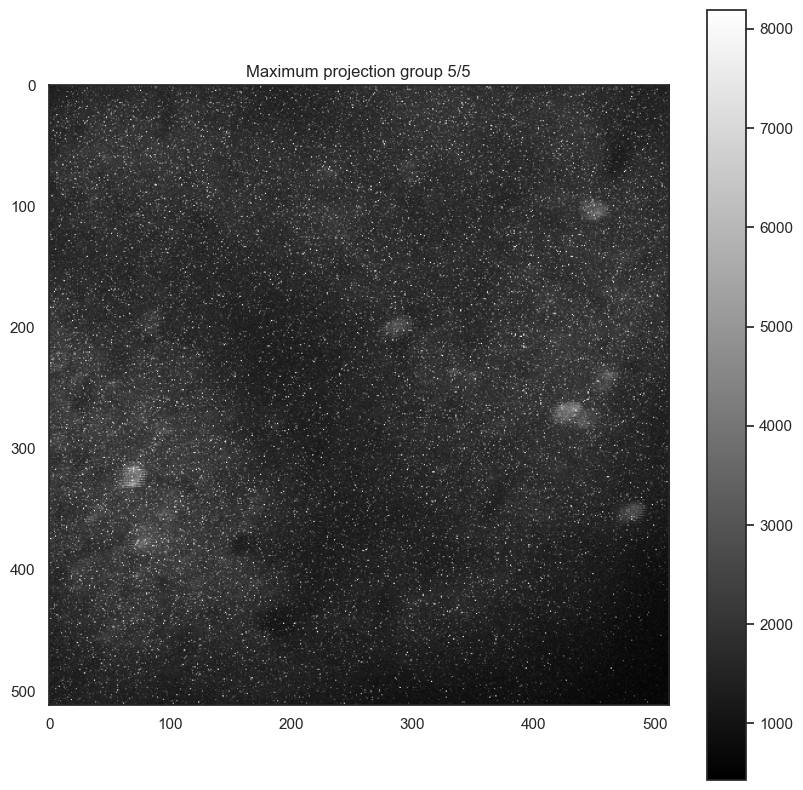

Processing groups: 100%|██████████| 5/5 [19:50<00:00, 238.09s/it]

Processing completed. 5 maximum projections displayed.


In [7]:
#> check if there is drift in the tiff

from utils_funcs import process_large_tiff_max_projections

tiff_path = "//QNAP-AL001.dpag.ox.ac.uk/Data/MBL015/2025-05-16/TwoP/2025-05-16_t-001/2025-05-16_t-001_Cycle00001_Ch2.tif"
process_large_tiff_max_projections(tiff_path, frames_per_group=25000)

Warning: Make csv of corrected data before cutting the session short, and then cut the csv short manually

In [ ]:
#2> cut tiff

import tifffile
import numpy as np
import os

# Define input and output paths
input_file = "//QNAP-AL001.dpag.ox.ac.uk/Data/MBL015/2025-05-15/TwoP/2025-05-15_t-001/2025-05-15_t-001_Cycle00001_Ch2.tif"  # Replace with your input TIFF path
output_file = "//QNAP-AL001.dpag.ox.ac.uk/Data/MBL015/2025-05-15/TwoP/2025-05-15_t-001/2025-05-15_t-001_Cycle00001_Ch2_CUT.tif"   # Replace with your desired output path
frame_to_cut = 40000  # Replace with your desired frame number

# Open the TIFF file
print(f"Opening TIFF file: {input_file}")
with tifffile.TiffFile(input_file) as tif:
    # Get the total number of frames
    total_frames = len(tif.pages)
    print(f"Total frames in the file: {total_frames}")
    
    # Check if the frame number is valid
    if frame_to_cut >= total_frames:
        raise ValueError(f"Frame number {frame_to_cut} is greater than or equal to the total number of frames ({total_frames})")
    
    # Get image dimensions from the first frame
    first_frame = tif.pages[0].asarray()
    height, width = first_frame.shape
    
    # Create output file with the same metadata
    print(f"Creating output file: {output_file}")
    with tifffile.TiffWriter(output_file, bigtiff=True) as tif_out:
        # Process frames in chunks
        chunk_size = 100  # Process 100 frames at a time
        for start_frame in range(0, frame_to_cut, chunk_size):
            end_frame = min(start_frame + chunk_size, frame_to_cut)
            print(f"Processing frames {start_frame} to {end_frame}")
            
            # Read chunk of frames
            frames = np.stack([tif.pages[i].asarray() for i in range(start_frame, end_frame)])
            
            # Save chunk to output file
            tif_out.write(frames)

print(f"New TIFF file saved successfully with {frame_to_cut} frames") 

In [ ]:
#3> cut paq file

import tifffile
import numpy as np
import os
from paq2py import paq_read
from utils_funcs import adjust_paq_to_tiff

# Define the paths of your TIFF and PAQ files
tiff_path = "//QNAP-AL001.dpag.ox.ac.uk/Data/MBL015/2025-05-15/TwoP/2025-05-15_t-001/2025-05-15_t-001_Cycle00001_Ch2.tif"
paq_path = "//QNAP-AL001.dpag.ox.ac.uk/Data/MBL015/2025-05-15/TwoP/2025-05-15_MBL015_1_paq.paq"
output_paq_path = "//QNAP-AL001.dpag.ox.ac.uk/Data/MBL015/2025-05-15/TwoP/2025-05-15_MBL015_1_paq_adjusted.paq"  # optional

new_paqfile = adjust_paq_to_tiff(tiff_path, paq_path, output_paq_path)